In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"D:\.1--MCA--MSU--\MCA_SEM_3\Machine Learning\BigMart Sales Prediction\bigmart_data.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Item_Identifier = unique item id  
Item_Weight = weight of product  
Item_Fat_Content = two category "Low Fat" and "Regular"  
Item_Visibility	= how visible item is on shelf  
Item_Type = category of item  
Item_MRP = MRP of product  
Outlet_Identifier = unique store id  
Outlet_Establishment_Year = year of establishment  
Outlet_Size	= size of outlet "Medium", "High", "Small"  
Outlet_Location_Type = location according to city "Tier-1", "Tier-2", "Tier-3"  
Outlet_Type = type of outlet "type1", "type2", "type3", "grocery_store"  
Item_Outlet_Sales = target variable which gives sales

In [5]:
df.shape

(8523, 12)

numerical column = 5  
categorical column = 7

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
missing_value = df['Item_Weight'].isnull().sum() * 100 / len(df)
item_weight_nullValues = round(missing_value,3) 
print(f"{item_weight_nullValues} % are null value in Item_weight")

17.165 % are null value in Item_weight


In [9]:
missing_value1 = df['Outlet_Size'].isnull().sum() * 100 / len(df)
outlet_size_nullValue = round(missing_value1,3)
print(f"{outlet_size_nullValue} % are null value in Outlet_Size")

28.276 % are null value in Outlet_Size


In [10]:
print(f"Any duplicated data in dataset : {df.duplicated().any()}")

Any duplicated data in dataset : False


### Handling Missing Values


In [11]:
df['Item_Weight'].dtype

dtype('float64')

In [12]:
df['Outlet_Size'].dtype

dtype('O')

## *Handling Numerical Missing Values*

In [13]:
mean_weight = df['Item_Weight'].mean()
median_weight = df['Item_Weight'].median()
print("Mean of weight : ",mean_weight)
print("Median of weight : ",median_weight)

Mean of weight :  12.857645184135976
Median of weight :  12.6


In [14]:
df['Item_Weight_Mean'] = df['Item_Weight'].fillna(mean_weight)
df['Item_Weight_Median'] = df['Item_Weight'].fillna(median_weight)

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


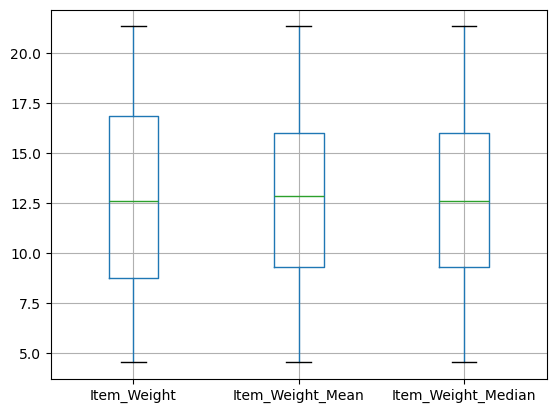

In [16]:
df[['Item_Weight', 'Item_Weight_Mean', 'Item_Weight_Median']].boxplot()
plt.show()

After filling missing values with Mean and Median there is reduction in spread of data so this is not acceptable and therfore using INTERPLOATE method of Pandas

In [17]:
# interpolate = method to fill missing values in 
# using linear interploate which is default method which fills missing values based on the known values around them
#drawing straight line between two data points and filling missing values with values along the line 

df['Item_Weight_Interploate'] = df['Item_Weight'].interpolate(method = 'linear')

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Interploate
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93


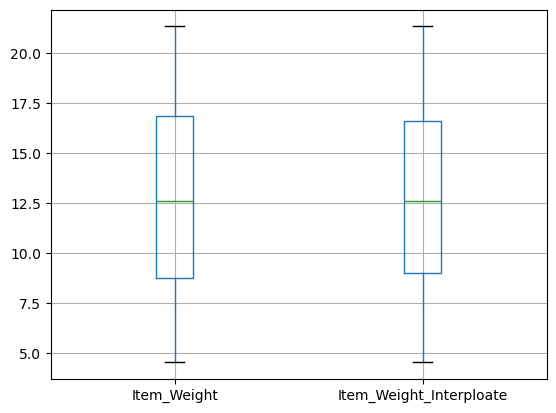

In [19]:
df[['Item_Weight', 'Item_Weight_Interploate']].boxplot()
plt.show()

Using KNN Imputer Method 

In [20]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 10, weights = "distance")
df['KNN_Imputer'] = knn.fit_transform(df[['Item_Weight']]).ravel()

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Interploate,KNN_Imputer
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93,8.93


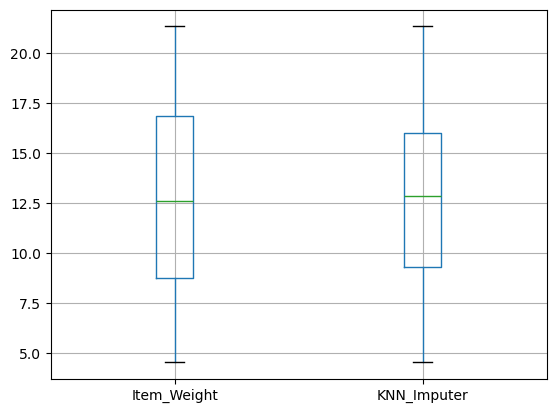

In [22]:
df[['Item_Weight', 'KNN_Imputer']].boxplot()
plt.show()

### From above three methods Linear Interploate is best suited for our data and we will remove other columns

In [23]:
df = df.drop(['Item_Weight', 'Item_Weight_Mean', 'Item_Weight_Median', 'KNN_Imputer'], axis = 1)

In [24]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


## *Handling Categorical Missing Value*

In [25]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [26]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

Based on outlet_type we will fill the missing values in outlet_size

In [27]:
mode_outlet = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x : x.mode()[0]))
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [28]:
missing_value2 = df['Outlet_Size'].isnull()
missing_value2

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [29]:
df.loc[missing_value2, 'Outlet_Size'] = df.loc[missing_value2, 'Outlet_Type'].apply(lambda x : mode_outlet[x])

In [30]:
 df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_Interploate      0
dtype: int64

### Item_Fat_Count

In [31]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [32]:
df.replace({'Item_Fat_Content' : {'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'}}, inplace = True)

In [33]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## Item_Visibility

In [34]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [35]:
df['Item_Visibility_Interpolate'] = df['Item_Visibility'].replace(0,np.nan).interpolate(method = 'linear')

In [36]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interploate,Item_Visibility_Interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [37]:
df['Item_Visibility_Interpolate'].value_counts()

Item_Visibility_Interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

In [38]:
df = df.drop('Item_Visibility', axis = 1)

In [39]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interploate,Item_Visibility_Interpolate
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


## Item_Type

In [40]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

## Item_identifier

In [41]:
df['Item_Identifier'].value_counts().sample(5)

Item_Identifier
FDU09    2
FDG12    6
NCM29    7
FDY60    5
FDA23    6
Name: count, dtype: int64

In [42]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x : x[:2])

In [43]:
df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

## Outlet_Establishment_Year

In [44]:
df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [45]:
import datetime as dt
current_year = dt.datetime.today().year
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']
df.head()
df = df.drop('Outlet_Establishment_Year', axis = 1)

In [46]:
from sklearn.preprocessing import OrdinalEncoder
df_encoded = df.copy()
category_columns = df.select_dtypes(include = ['object']).columns

for columns in category_columns:
    oe = OrdinalEncoder()
    df_encoded[columns] = oe.fit_transform(df_encoded[[columns]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


Mapping of Item_type  
0: Baking Goods
1: Breads
2: Breakfast
3: Canned
4: Dairy
5: Frozen Foods
6: Fruits and Vegetables
7: Hard Drinks
8: Health and Hygiene
9: Household
10: Meat
11: Others
12: Seafood
13: Snack Foods
14: Soft Drinks
15: Starchy Foods  

Mapping of Outlet_Identifier  
OUT10 = 0.0 |
OUT13 = 1.0 |
OUT17 = 2.0 |
OUT18 = 3.0 |
OUT19 = 4.0 |
OUT27 = 5.0 |
OUT35 = 6.0 |
OUT45 = 7.0 |
OUT46 = 8.0 |
OUT49 = 9.0  
  
Mapping of Outlet_Size  
High = 0.0 |
Medium = 1.0 |
Small = 2.0  
  
Mapping of Outlet_Type  
Supermarket Type1 = 1.0 |
Grocery Store = 0.0 |
Supermarket Type3 = 3.0 |
Supermarket Type2 = 2.0


In [47]:
df_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interploate,Item_Visibility_Interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,37


In [48]:
X = df_encoded.drop('Item_Outlet_Sales', axis = 1)
y = df_encoded['Item_Outlet_Sales']

In [49]:
X

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_Interploate,Item_Visibility_Interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,37
8519,1.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,22
8520,2.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,20
8521,1.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,15


In [50]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## *Random Forest*

In [52]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators = 100, random_state = 42)
score_xg = cross_val_score(xg, X, y, cv = 5, scoring = 'r2')
print(score_xg.mean())


0.5956602202104594


In [ ]:
xg = XGBRFRegressor(n_estimators = 100, random_state = 42)
xg1 = xg.fit(X, y)
x
pd.DataFrame({
    'feature' : X.columns,
    'XGBRF_importance' : xg1.feature_importances_
}).sort_values(by = 'XGBRF_importance', ascending = False)

,feature,XGBRF_importance
7,Outlet_Type,0.423386
10,Outlet_Age,0.169442
3,Item_MRP,0.160600
5,Outlet_Size,0.101296
4,Outlet_Identifier,0.099362
6,Outlet_Location_Type,0.036353
9,Item_Visibility_Interpolate,0.003181
8,Item_Weight_Interploate,0.002475
2,Item_Type,0.002263
0,Item_Identifier,0.000967


after seeing feature importance we will take the top five columns into over consideration

In [54]:
final_data = X.drop(columns = ['Outlet_Location_Type', 'Item_Visibility_Interpolate', 'Item_Weight_Interploate', 'Item_Type', 'Item_Identifier', 'Item_Fat_Content'], axis = 1)
final_data.head()

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37


In [55]:
# Checking our R-squared score after droping columns that are not needed
score_xg = cross_val_score(xg1, final_data, y, cv = 5, scoring = 'r2')
print(score_xg.mean())


0.596332173045327


## *Training Model*

In [56]:
from xgboost import XGBRFRegressor
xg_model = XGBRFRegressor()
xg_model.fit(final_data, y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size = 0.2, random_state = 42)
xg_model.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [58]:
y_pred = xg_model.predict(X_test)

In [59]:
print(f"Difference between actual values and predicted values according to mean absolute error is : {mean_absolute_error(y_test, y_pred)}")

Difference between actual values and predicted values according to mean absolute error is : 713.5792228647217


## *Prediction*

Mapping of Item_type  
0: Baking Goods
1: Breads
2: Breakfast
3: Canned
4: Dairy
5: Frozen Foods
6: Fruits and Vegetables
7: Hard Drinks
8: Health and Hygiene
9: Household
10: Meat
11: Others
12: Seafood
13: Snack Foods
14: Soft Drinks
15: Starchy Foods  

Mapping of Outlet_Identifier  
OUT10 = 0.0 |
OUT13 = 1.0 |
OUT17 = 2.0 |
OUT18 = 3.0 |
OUT19 = 4.0 |
OUT27 = 5.0 |
OUT35 = 6.0 |
OUT45 = 7.0 |
OUT46 = 8.0 |
OUT49 = 9.0  
  
Mapping of Outlet_Size  
High = 0.0 |
Medium = 1.0 |
Small = 2.0  
  
Mapping of Outlet_Type  
Supermarket Type1 = 1.0 |
Grocery Store = 0.0 |
Supermarket Type3 = 3.0 |
Supermarket Type2 = 2.0


In [60]:
# Input variable = "Item_MRP", "Outlet_Identifier",	"Outlet_Size",	"Outlet_Type",	"Outlet_Age"
predicted_price = xg_model.predict(np.array([[141.6180, 9.0, 1.0, 1.0, 24]]))
print(predicted_price)


[2058.0156]
